In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

In [98]:
# Read the data from both train.csv and test.csv
train_data = pd.read_csv("train.csv")

In [102]:
# Data manipulation 
# feel free to uncomment all the print lines to see the change in the data set
a = "Burn Rate"
b = "Resource Allocation"
c = "Mental Fatigue Score"

# Drop all the unused columns from the dataset

data = train_data.drop(columns=["Date of Joining","Gender","Company Type","WFH Setup Available", "Designation", "Employee ID"])

# Data cleaning 
train_data_cleaned = data.dropna(subset=[a, b, c])

# print(train_data_cleaned)

# Separate features (X) and target (y) 
X = train_data_cleaned[[b, c]].copy()
y = train_data_cleaned[[a]].copy()

# print(X)
# print(y)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# print(X_train)

# Flatten y_train to a 1-dimensional array
y_train_flat = y_train.values.ravel()

# print(y_train_flat)

Regression Equation: Burn Rate = 0.0973627735 * Mental Fatigue Score + -0.1056281247
Correlation coefficient: 0.9999999999999983
Mean Squared Error (MSE): 0.004202475124432487
Root Mean Squared Error (RMSE): 0.06482650017109119
Mean Absolute Error (MAE): 0.054322735174858916
R-squared (Coefficient of Determination): 0.8913816527137665


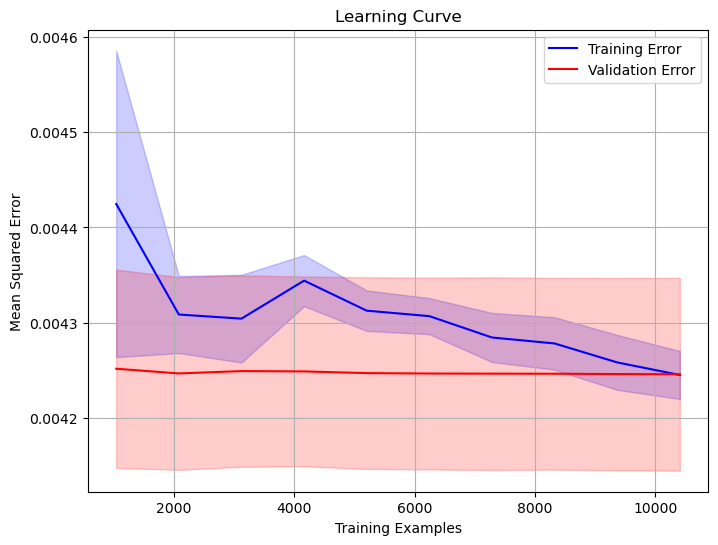

In [100]:
# model 1: linear regression
# Separate features (X) and target (y) 
# replace c with b to change independent variable 
X = train_data_cleaned[[c]].copy()
y = train_data_cleaned[[a]].copy()

# print(X)
# print(y)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_lr = regr.predict(X_test)

m = regr.coef_[0][0]  # Extract the coefficient
i = regr.intercept_[0]  # Extract the intercept

# make sure you replace the variable below by b or c (if applicable)
print(f"Regression Equation: Burn Rate = {m:.10f} * {c} + {i:.10f}")

# Computing Correlation coeff
# Remove missing values (NaN) from the data

x = np.array(X_test)
y = np.array(y_pred_lr)
valid_indices = ~np.isnan(x) & ~np.isnan(y)
x_valid = x[valid_indices]
y_valid = y[valid_indices]

# Calculate the correlation coefficient
correlation_matrix = np.corrcoef(x_valid, y_valid)
correlation_coefficient = correlation_matrix[0, 1]

print("Correlation coefficient:", correlation_coefficient) 

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lr)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lr)

# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred_lr)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (Coefficient of Determination):", r_squared)

# Define your linear regression model
model = LinearRegression()

# Create learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for train and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', color='red')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='red')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Predicted Burn Rate 
 [[0.24937379]
 [0.39978551]
 [0.35497832]
 ...
 [0.35071717]
 [0.75714514]
 [0.32831358]]
Mean Squared Error (MSE): 0.0031150585392848646
Root Mean Squared Error (RMSE): 0.05581270947808272
Mean Absolute Error (MAE): 0.04586910850999231
R-squared (Coefficient of Determination): 0.919487325869018


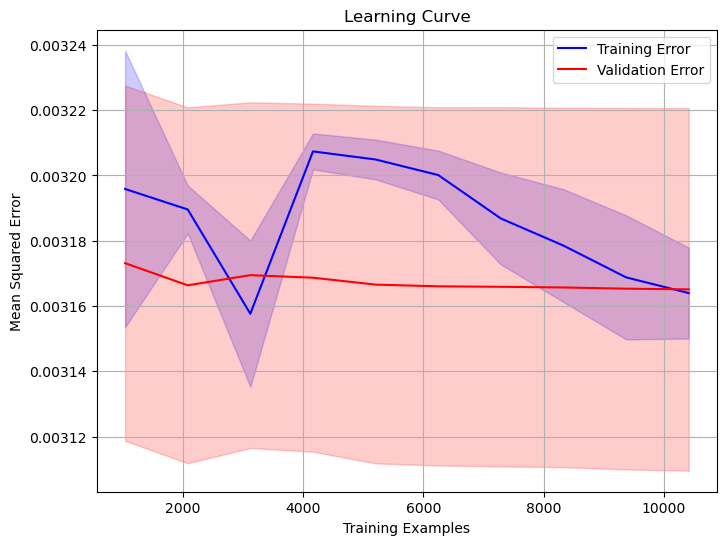

Coeff of Resource Allocation 
 0.026664741543438064
Coeff of Mental Fatigue Score 
 0.07467864316938364
Intercept: 
 -0.09520240306937633
Regression Equation: Burn Rate = -0.0952024031 + 0.0266647415 * Resource Allocation + 0.0746786432 * Mental Fatigue Score 


In [103]:
# model 2: multiple linear regression (empty rows removed)

# if you have previously run the cell above (linear regression), 
# make sure to run the "data manipulation" cell again before running this model. 

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_mlr = regr.predict(X_test)

print("Predicted Burn Rate \n",y_pred_mlr)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_mlr)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_mlr)

# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred_mlr)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (Coefficient of Determination):", r_squared)

# Define your linear regression model
model = LinearRegression()

# Create learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for train and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', color='red')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='red')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()

beta0 = regr.coef_[0][0]
beta1 = regr.coef_[0][1] 
i = regr.intercept_[0]

print("Coeff of Resource Allocation \n", beta0)
print("Coeff of Mental Fatigue Score \n", beta1)
print("Intercept: \n", i)

print(f"Regression Equation: Burn Rate = {i:.10f} + {beta0:.10f} * {b} + {beta1:.10f} * {c} ")


Cross-validation scores: [0.8804761  0.87866211 0.88545131 0.87762986 0.89088719]
Average cross-validation score: 0.8826213140904947


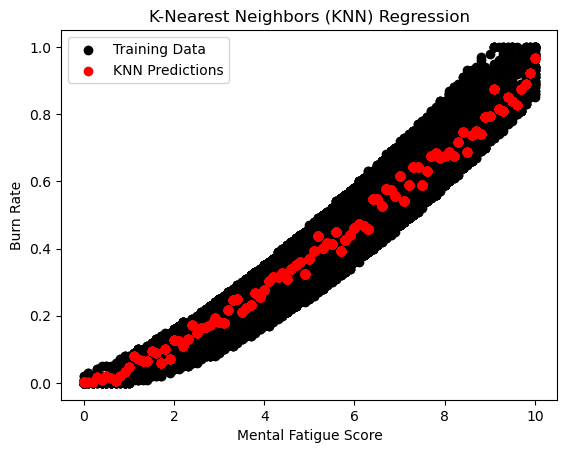

Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error (MAE): 0.055177335485027804
R-squared (Coefficient of Determination): 0.8846935038909346


In [95]:
# model 3: K-Nearest Neighbors (KNN) regression (empty rows removed)

a = "Mental Fatigue Score"
b = "Burn Rate"

X = train_data_cleaned[[a]].copy()
y = train_data_cleaned[[b]].copy()

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create K-Nearest Neighbors (KNN) regression object with K=5 (you can choose any value of K)
knn = KNeighborsRegressor(n_neighbors=5)

# Perform cross-validation
cross_val_scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation

# Fit the model using the training data
knn.fit(X_train, y_train)

# Make predictions using the training set to get the regression line
y_pred_knn = knn.predict(X_test)

# Plot outputs
plt.scatter(X_train, y_train, color="black", label="Training Data")
plt.scatter(X_test, y_pred_knn, color="red", label="KNN Predictions")
plt.title('K-Nearest Neighbors (KNN) Regression')
plt.ylabel(b)
plt.xlabel(a)
plt.legend()

# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", np.mean(cross_val_scores))

plt.show()

# Compute regression evaluation metrics
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_knn)
r_squared = r2_score(y_test, y_pred_knn)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (Coefficient of Determination):", r_squared)
